In [2]:
# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from imblearn.over_sampling import SMOTE

In [3]:
# 2. LOAD DATASET
df = pd.read_csv(r"D:\New folder (2)\final project of pd\students_dropout_academic_success.csv")
print(df.head())
print(df.info())

# 3. DATA CLEANING
df = df.drop_duplicates()

   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [4]:
# Fill missing values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

print("Missing values:\n", df.isnull().sum())

Missing values:
 Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

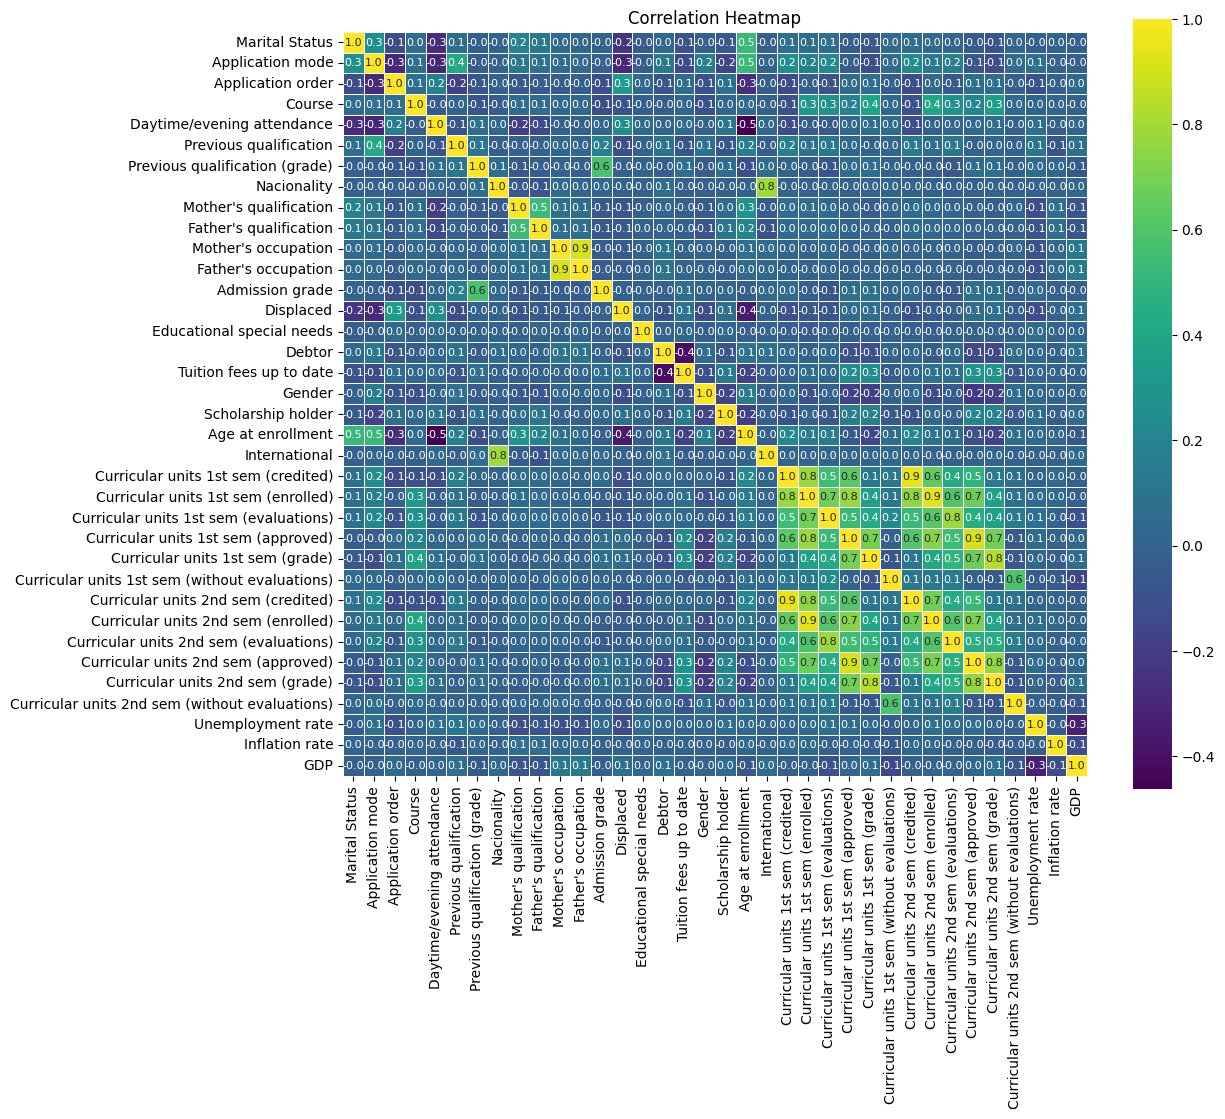

In [5]:
# 4. CORRELATION HEATMAP
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    fmt=".1f",
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# 5. TARGET ENCODING
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

print("Target Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))



Target Mapping:
{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


In [7]:
# 6. FEATURE SELECTION
X = df[
    [
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Tuition fees up to date',
        'Scholarship holder',
        'Age at enrollment',
        'Debtor'
    ]
]

y = df['target']

In [8]:
# 7. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
# 8. FEATURE SCALING
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 9. SMOTE (ONLY TRAIN DATA)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)


In [11]:
# 10. MODEL TRAINING
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42)
}

accuracies = {}
predictions = {}


In [12]:
# Scaled + SMOTE models
for name in ["Logistic Regression", "Naive Bayes", "KNN"]:
    models[name].fit(X_train_smote, y_train_smote)
    preds = models[name].predict(X_test_scaled)
    predictions[name] = preds
    accuracies[name] = accuracy_score(y_test, preds) * 100

# Decision Tree (no scaling)
models["Decision Tree"].fit(X_train, y_train)
dt_preds = models["Decision Tree"].predict(X_test)
predictions["Decision Tree"] = dt_preds
accuracies["Decision Tree"] = accuracy_score(y_test, dt_preds) * 100

In [13]:
# 11. MODEL RESULTS
print("\nMODEL ACCURACY\n")
for model, acc in accuracies.items():
    print(f"{model:20s}: {acc:.2f}%")

print("\nCLASSIFICATION REPORTS\n")
for model, preds in predictions.items():
    print(f"\n{model}")
    print(classification_report(y_test, preds))



MODEL ACCURACY

Logistic Regression : 65.54%
Naive Bayes         : 71.64%
KNN                 : 66.55%
Decision Tree       : 73.79%

CLASSIFICATION REPORTS


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       284
           1       0.33      0.58      0.42       159
           2       0.82      0.69      0.75       442

    accuracy                           0.66       885
   macro avg       0.65      0.64      0.63       885
weighted avg       0.72      0.66      0.68       885


Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       284
           1       0.43      0.36      0.39       159
           2       0.75      0.89      0.82       442

    accuracy                           0.72       885
   macro avg       0.66      0.63      0.64       885
weighted avg       0.71      0.72      0.71       885


KNN
              precision    recall  f1-sco

In [14]:
# 12. BEST MODEL
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("\nBEST MODEL:", best_model_name)
print("BEST ACCURACY: {:.2f}%".format(accuracies[best_model_name]))


BEST MODEL: Decision Tree
BEST ACCURACY: 73.79%


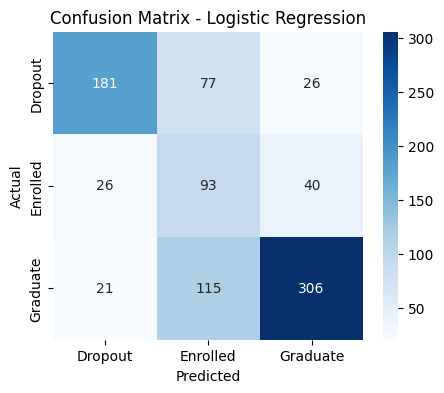

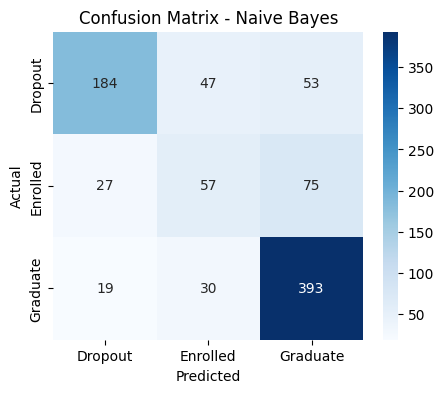

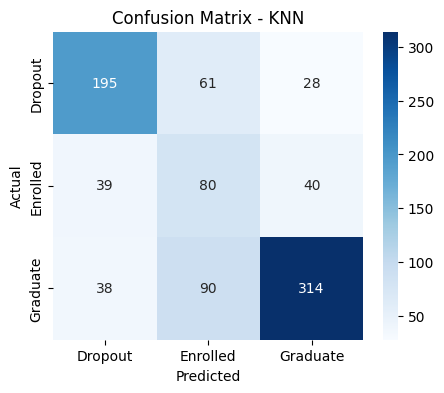

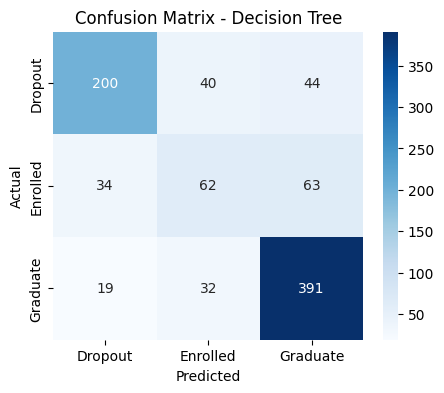

In [15]:
# 13. CONFUSION MATRIX (ALL MODELS)
class_labels = ["Dropout", "Enrolled", "Graduate"]

for model_name, preds in predictions.items():
    cm = confusion_matrix(y_test, preds)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_labels,
        yticklabels=class_labels
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

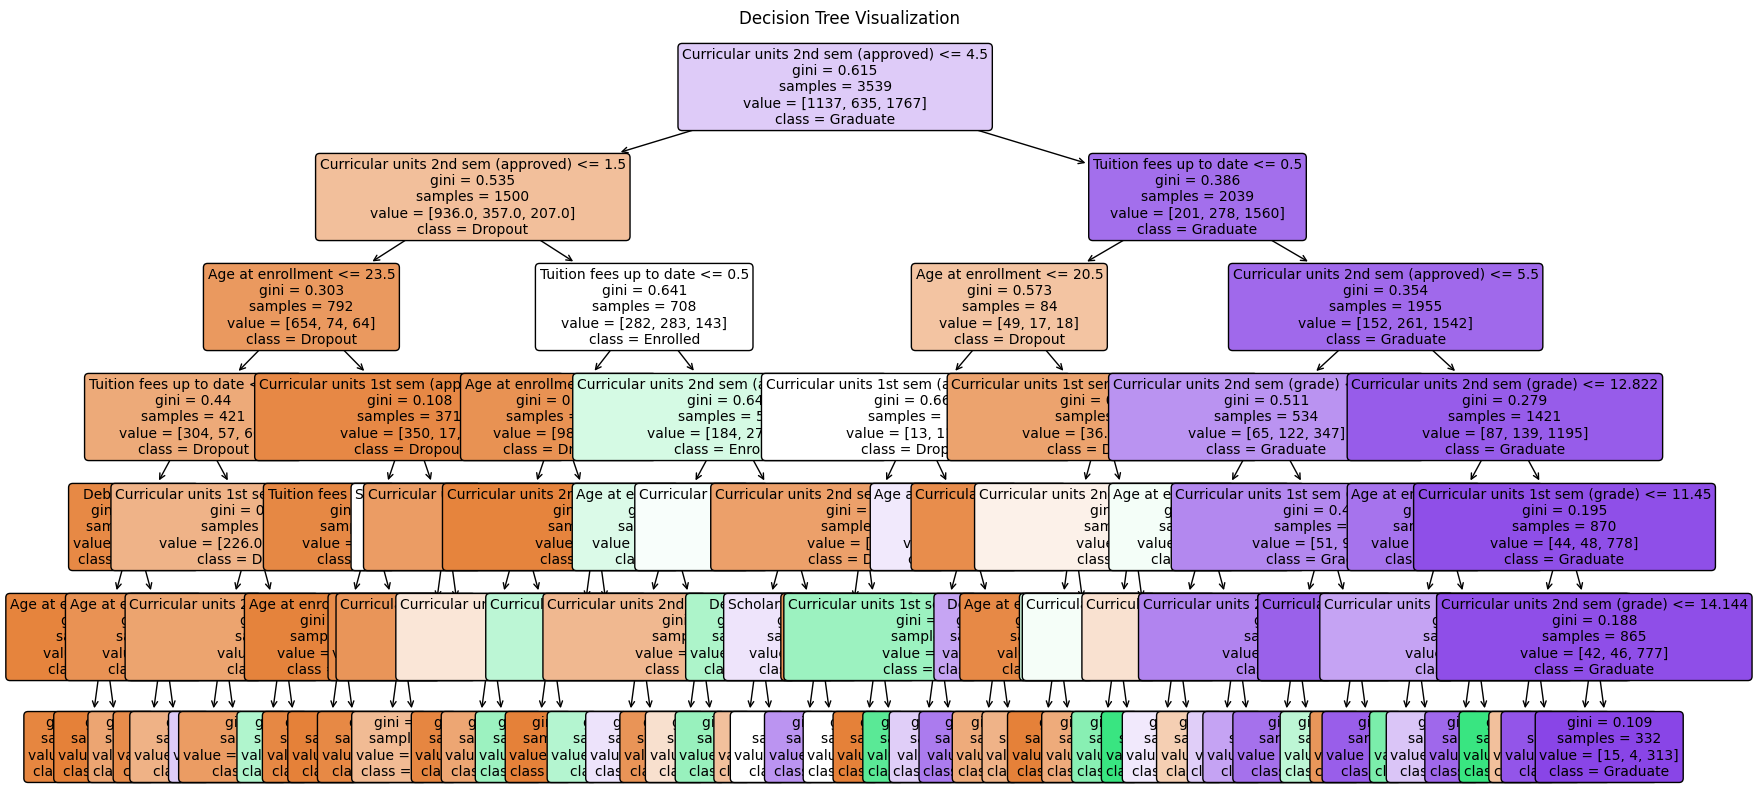

In [16]:
# 14. DECISION TREE VISUALIZATION
plt.figure(figsize=(20, 10))
plot_tree(
    models["Decision Tree"],
    feature_names=X.columns,
    class_names=class_labels,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [17]:
# 15. USER INPUT PREDICTION
print("\n--- USER INPUT PREDICTION ---")

cu2_approved = float(input("Curricular units 2nd sem (approved): "))
cu2_grade = float(input("Curricular units 2nd sem (grade): "))
cu1_approved = float(input("Curricular units 1st sem (approved): "))
cu1_grade = float(input("Curricular units 1st sem (grade): "))
fees = int(input("Tuition fees up to date (1 = Yes, 0 = No): "))
scholarship = int(input("Scholarship holder (1 = Yes, 0 = No): "))
age = float(input("Age at enrollment: "))
debtor = int(input("Debtor (1 = Yes, 0 = No): "))

user_input = np.array(
    [[cu2_approved, cu2_grade, cu1_approved, cu1_grade,
      fees, scholarship, age, debtor]]
)

# Scale if required
if best_model_name != "Decision Tree":
    user_input = scaler.transform(user_input)

pred = best_model.predict(user_input)[0]

mapping = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
print("\nFINAL PREDICTION:", mapping[pred])



--- USER INPUT PREDICTION ---


Curricular units 2nd sem (approved):  15
Curricular units 2nd sem (grade):  5
Curricular units 1st sem (approved):  4
Curricular units 1st sem (grade):  6
Tuition fees up to date (1 = Yes, 0 = No):  0
Scholarship holder (1 = Yes, 0 = No):  1
Age at enrollment:  19
Debtor (1 = Yes, 0 = No):  1



FINAL PREDICTION: Enrolled


C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
